# Predicting fetal health using machine learning

This notebook uses Python-based machine learning tools to build a machine learning model capable of predicting whether or not a fetus' health is normal, suspect, or pathological based on their medical attributes.

I am going to take the following approach:
1. Problem definition
2. Data
3. Evaluation
4. Features
5. Modelling
6. Experimentation

## 1. Problem Definition

> Given clinical parameters about a patient, can I determine whether their fetus' health is: Normal,
Suspect, 
or Pathological

## 2. Data

The data came from a Kaggle dataset  repository.https://www.kaggle.com/andrewmvd/fetal-health-classification


21 Attributes

baseline value - Baseline Fetal Heart Rate

accelerations - Number of accelerations per second

fetal_movement - Number of fetal movements per second

uterine_contractions - Number of uterine contractions per second

light_decelerations - Number of LDs per second

severe_decelerations - Number of SDs per second

prolongued_decelerations - Number of PDs per second

abnormal_short_term_variability - Percentage of time with abnormal short term variability

mean_value_of_short_term_variability - Mean value of short term variability

percentage_of_time_with_abnormal_long_term_variability - Percentage of time with abnormal long term variability

mean_value_of_long_term_variability - Mean value of long term variability

histogram_width - Width of the histogram made using all values from a record

histogram_min - Histogram minimum value

histogram_max - Histogram maximum value

histogram_number_of_peaks - Number of peaks in the exam histogram

histogram_number_of_zeroes - Number of zeroes in the exam histogram

histogram_mode - Hist mode

histogram_mean - Hist mean

histogram_median - Hist Median

histogram_variance - Hist variance

histogram_tendency - Histogram trend

## 3. Evaluation

> Attempt to reach 95% accuracy at predicting whether or not a patient's fetus' health is Normal,
Suspect, or
Pathological

## 4. Features

I include information about each of the features in the data.


## Preparing the tools
I will use Pandas, Seaborn, Matplotlib and NumPy for data analysis and manipulation



In [1]:
#Import all the tools
#Regular Exploritory Data Analysis and plotting libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle 

#to show plots within notebook
%matplotlib inline 

#Models from Scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

#Model Evaluations
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

import ipywidgets as widgets


In [2]:
df = pd.read_csv("fetal_health.csv")
df_2=df.copy(deep = True)

## Data Exploration (EDA - Exploratory Data Analysis)

The goal is to learn more about the data

In [3]:
df.head()

,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
0,120,0.000,0.0,0.000,0.000,0.0,0.0,73,0.5,43,...,62,126,2,0,120,137,121,73,1,2
1,132,0.006,0.0,0.006,0.003,0.0,0.0,17,2.1,0,...,68,198,6,1,141,136,140,12,0,1
2,133,0.003,0.0,0.008,0.003,0.0,0.0,16,2.1,0,...,68,198,5,1,141,135,138,13,0,1
3,134,0.003,0.0,0.008,0.003,0.0,0.0,16,2.4,0,...,53,170,11,0,137,134,137,13,1,1
4,132,0.007,0.0,0.008,0.000,0.0,0.0,16,2.4,0,...,53,170,9,0,137,136,138,11,1,1


In [4]:
df.tail()


,baseline_value,accelerations,fetal_movement,uterine_contractions,light_decelerations,severe_decelerations,prolongued_decelerations,abnormal_short_term_variability,mean_value_of_short_term_variability,percentage_of_time_with_abnormal_long_term_variability,...,histogram_min,histogram_max,histogram_number_of_peaks,histogram_number_of_zeroes,histogram_mode,histogram_mean,histogram_median,histogram_variance,histogram_tendency,fetal_health
2121,140,0.000,0.000,0.007,0.0,0.0,0.0,79,0.2,25,...,137,177,4,0,153,150,152,2,0,2
2122,140,0.001,0.000,0.007,0.0,0.0,0.0,78,0.4,22,...,103,169,6,0,152,148,151,3,1,2
2123,140,0.001,0.000,0.007,0.0,0.0,0.0,79,0.4,20,...,103,170,5,0,153,148,152,4,1,2
2124,140,0.001,0.000,0.006,0.0,0.0,0.0,78,0.4,27,...,103,169,6,0,152,147,151,4,1,2
2125,142,0.002,0.002,0.008,0.0,0.0,0.0,74,0.4,36,...,117,159,2,1,145,143,145,1,0,1


## How many of each class there are

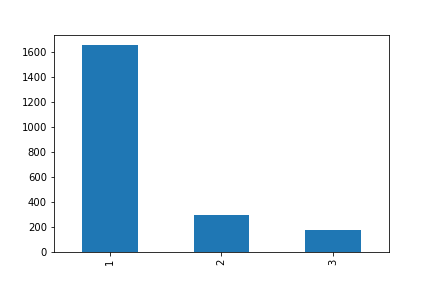

In [5]:
%matplotlib widget
df["fetal_health"].value_counts().plot(kind="bar");

## Clean up data by checking for missing values

In [6]:
#missing values
df.isna().sum()

baseline_value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

#### There are no missing values.

## Correlation matrix
Summarize data and display the relationships between each variable

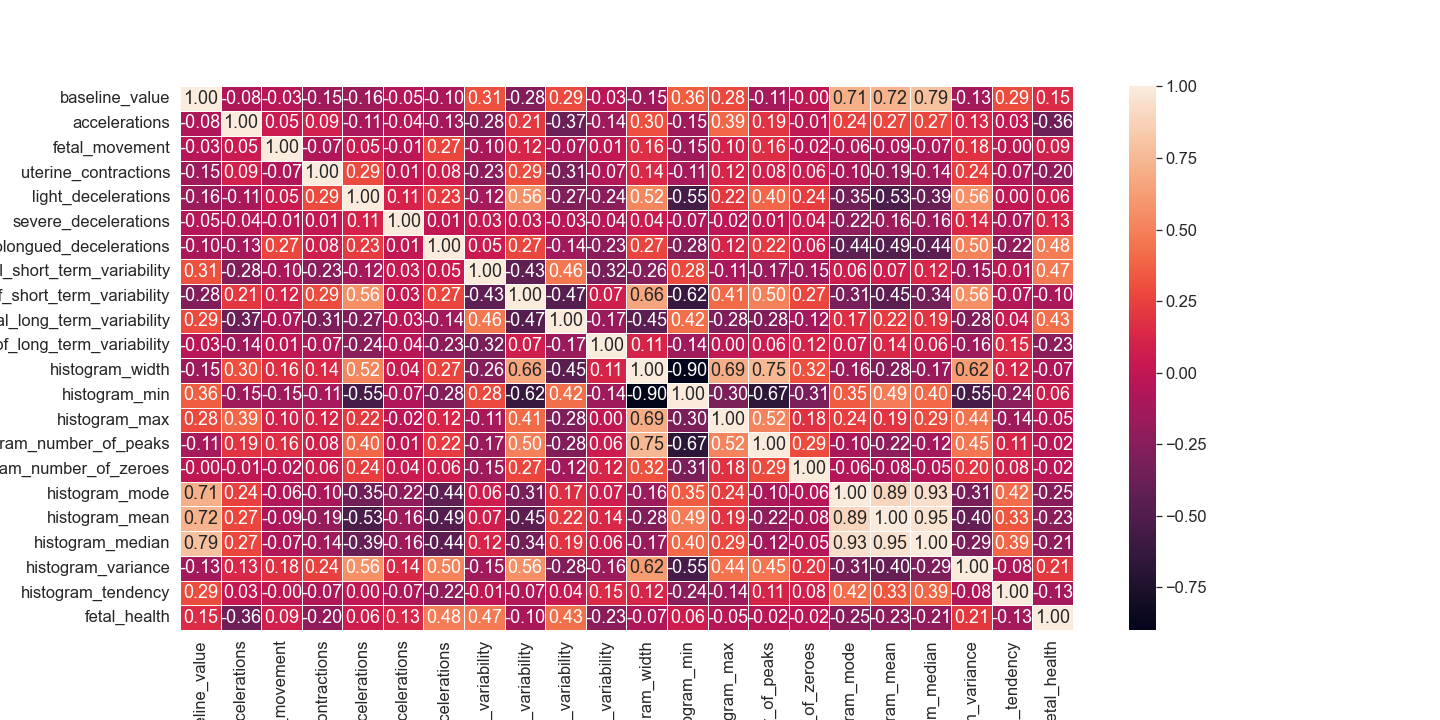

In [42]:
#correlation matrix heat map
%matplotlib widget
corr_matrix = df.corr()
fix, ax = plt.subplots(figsize = (20,10))
zx = sns.heatmap(corr_matrix, annot = True, linewidths = 0.5, fmt = ".2f");
bottom, top = ax.get_ylim()


## Histogram
To graphically summarize data distributions for each variable

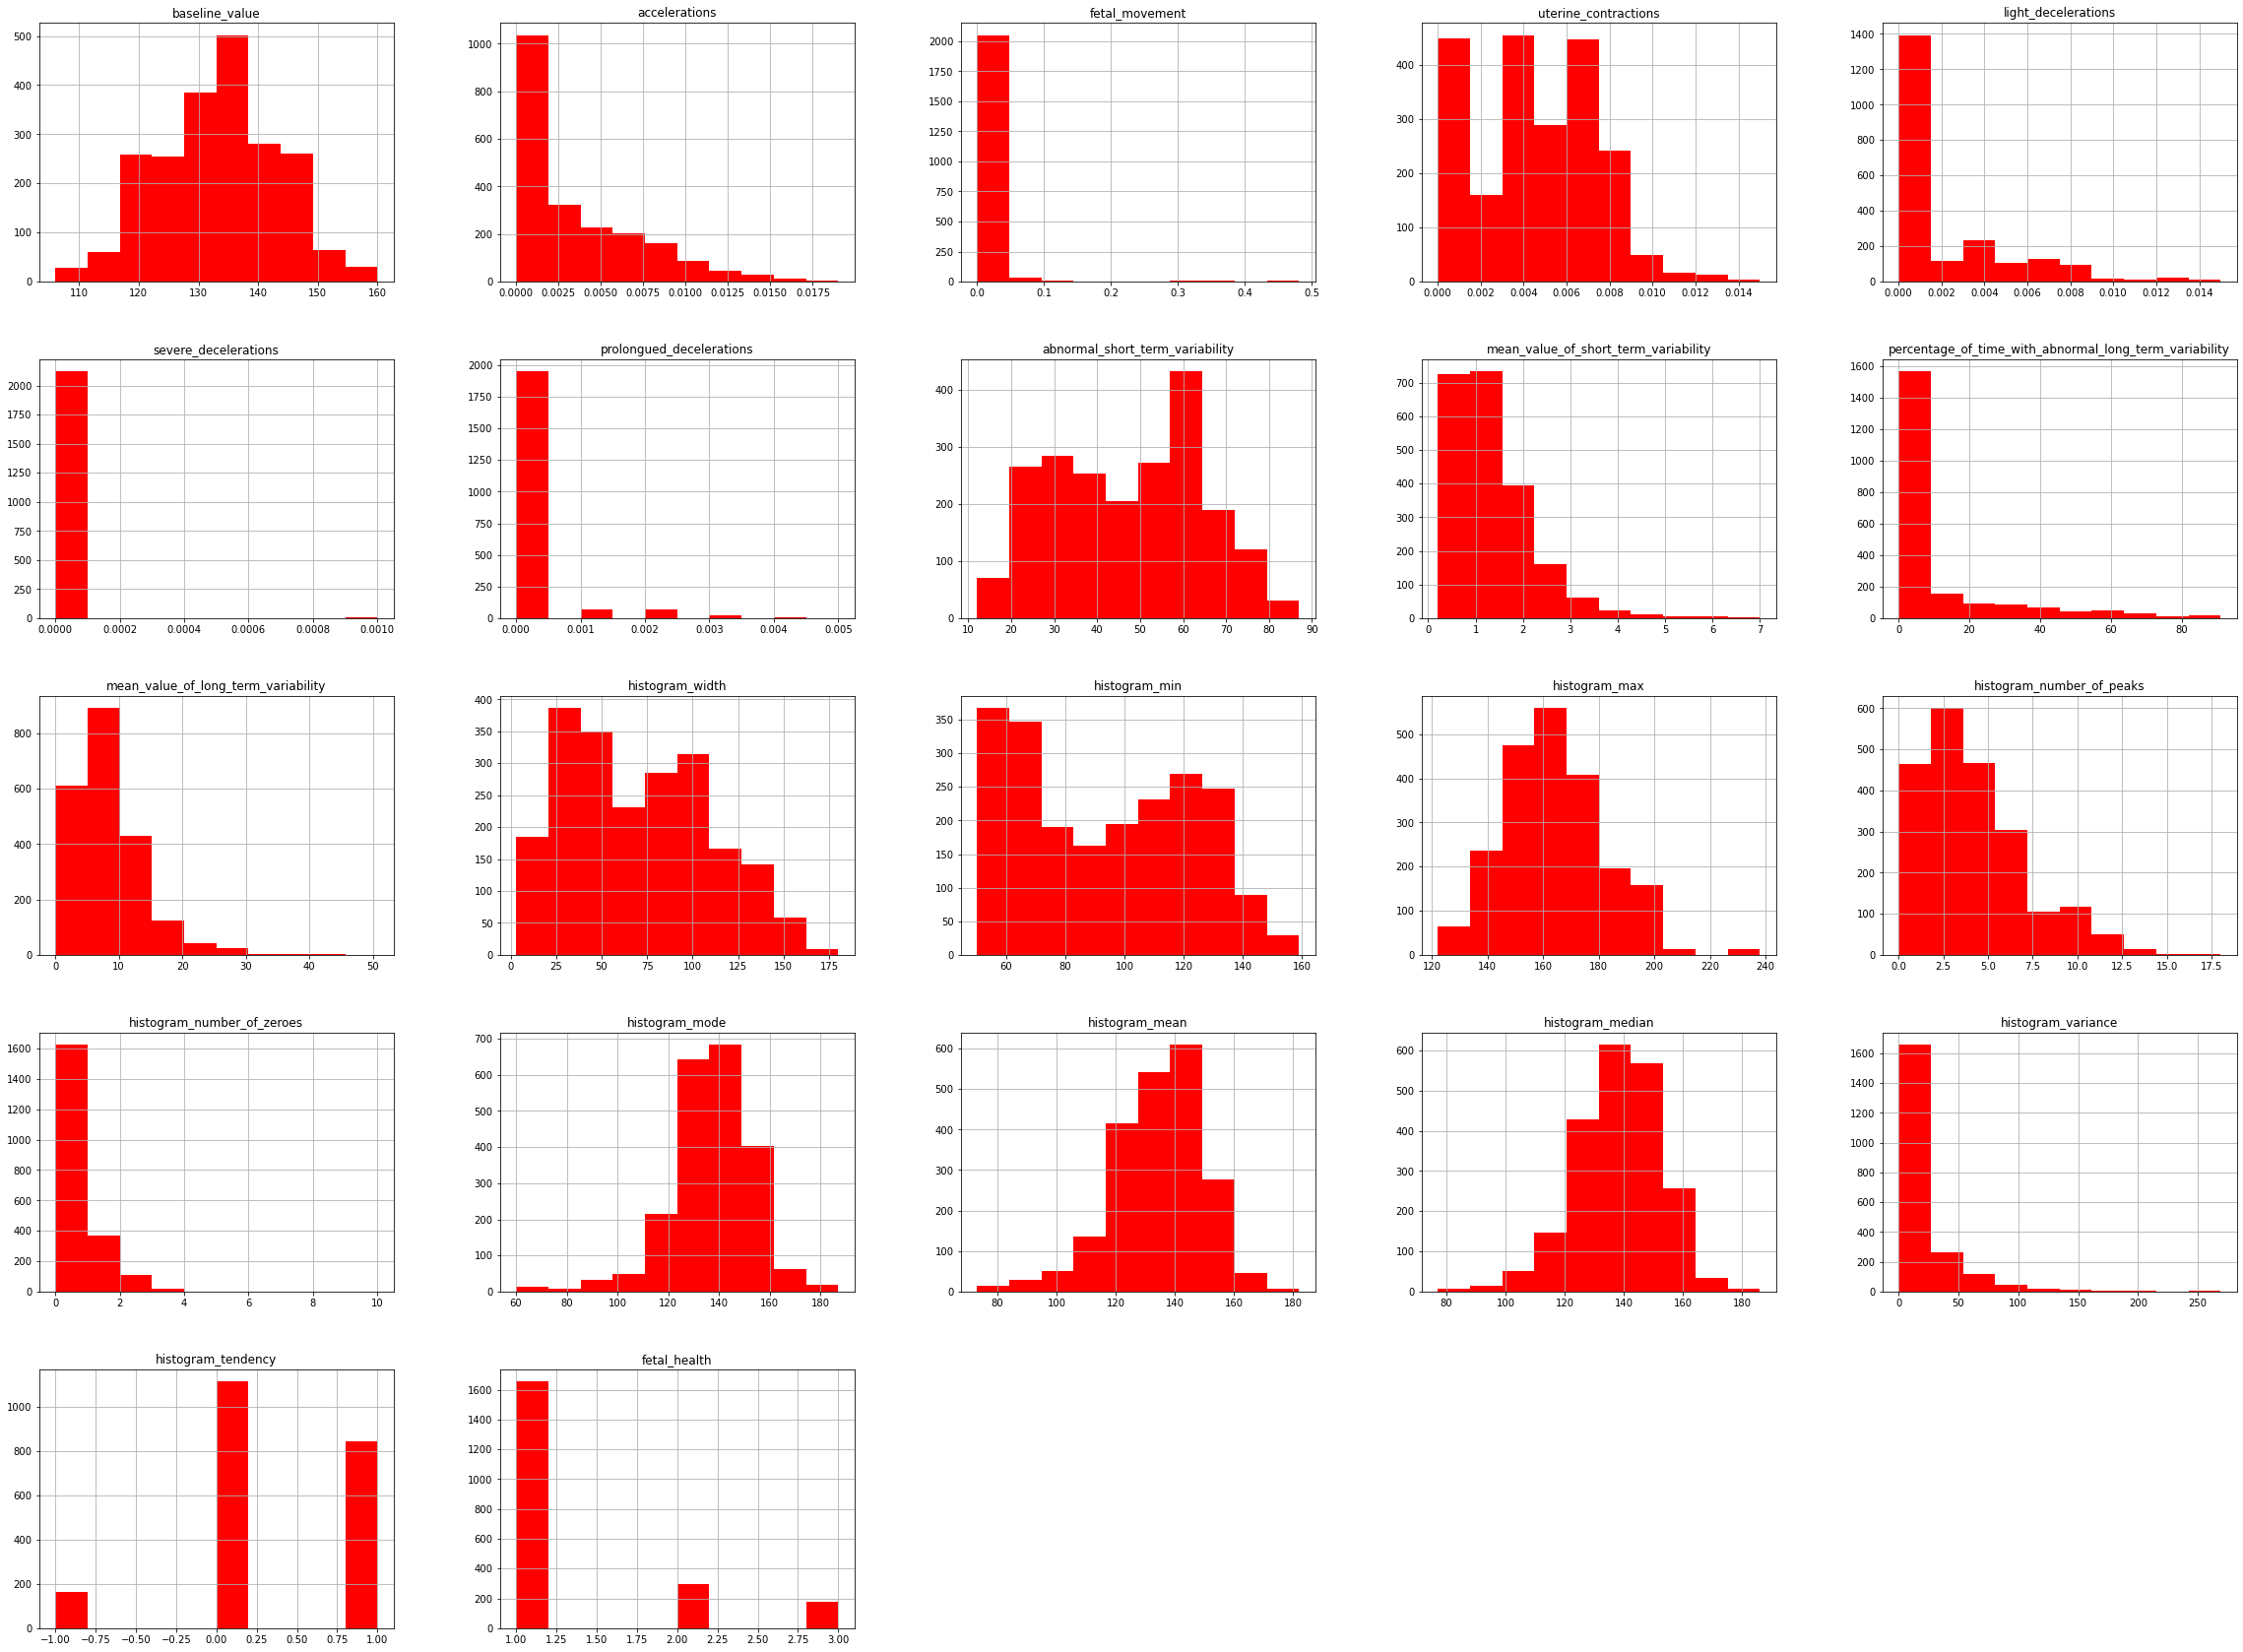

In [8]:
%matplotlib inline
p = df.hist(figsize=(40,30), color='r')


# Modeling

Split data into X and y

In [9]:
X = df.drop("fetal_health", axis = 1)
y = df["fetal_health"]

In [10]:
#split data into train and test sets
np.random.seed(50)

# Split into train and test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [11]:
y_train, len(y_train)


(105     1
 760     1
 1566    1
 666     2
 925     1
        ..
 132     1
 2014    1
 1931    1
 1504    1
 1712    1
 Name: fetal_health, Length: 1700, dtype: int64,
 1700)

# Test different models to check for accuracy

In [12]:
# Put models in a dictionary
models = {"Logistic Regression": LogisticRegression(),
         "KNN": KNeighborsClassifier(),
         "Random Forest": RandomForestClassifier()}

#Create a function to fit and socre models
def fit_score (models, x_train, x_test, y_train, y_test):
    """ 
    Fits and evaluates machine learning models.
    models: dictionary of different machine learning models
    x_train: training data
    x_test: testing data
    y_train: training labels
    y_test: test labels
    """
    
    #set seed
    np.random.seed(50)
    
    #list to make a dictionary to keep model scores
    model_scores = {}
    #loop though models
    for name, model in models.items():
        #fit model to data
        model.fit(x_train, y_train)
        #evaluate model and append score to model_scores
        model_scores[name] = model.score(x_test, y_test)
    return model_scores


In [13]:
model_scores = fit_score(models = models, 
                        x_train = x_train,
                        x_test = x_test,
                        y_train = y_train,
                        y_test = y_test)
model_scores


C:\Users\Darya\Desktop\classification_project\env\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8826291079812206,
 'KNN': 0.9131455399061033,
 'Random Forest': 0.9460093896713615}

Looks like random forest classifier is the best fit

Bar graph to compare models

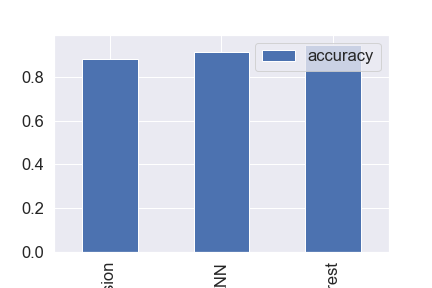

In [43]:
%matplotlib widget
model_compare = pd.DataFrame(model_scores, index = ["accuracy"])
model_compare.T.plot.bar();

# Tuning Model

In [15]:
#tuning KNN
train_scores = []
test_scores = []

#list of different values for n_neighbors
neighbors = range (1, 20)

#set up instance
knn = KNeighborsClassifier()

#loop through n_neighbors
for i in neighbors:
    knn.set_params(n_neighbors = i)
    
    #fit the algorithm
    knn.fit(x_train, y_train)
    
    #update train list
    train_scores.append(knn.score(x_train, y_train))
    
    #update test scores list
    test_scores.append(knn.score(x_test, y_test))
    


In [16]:
train_scores

[0.9988235294117647,
 0.9358823529411765,
 0.9370588235294117,
 0.9170588235294118,
 0.9205882352941176,
 0.908235294117647,
 0.91,
 0.9047058823529411,
 0.9035294117647059,
 0.8976470588235295,
 0.9,
 0.89,
 0.8935294117647059,
 0.8870588235294118,
 0.8870588235294118,
 0.8829411764705882,
 0.8870588235294118,
 0.8835294117647059,
 0.8852941176470588]

In [17]:
test_scores

[0.9178403755868545,
 0.92018779342723,
 0.9178403755868545,
 0.9154929577464789,
 0.9131455399061033,
 0.9131455399061033,
 0.9225352112676056,
 0.9014084507042254,
 0.8943661971830986,
 0.8990610328638498,
 0.8990610328638498,
 0.8943661971830986,
 0.8967136150234741,
 0.8967136150234741,
 0.8943661971830986,
 0.8943661971830986,
 0.8943661971830986,
 0.8967136150234741,
 0.8873239436619719]

### Visualize number of neighbors for best accuracy

Maximum KNN score on the test data: 92.25%


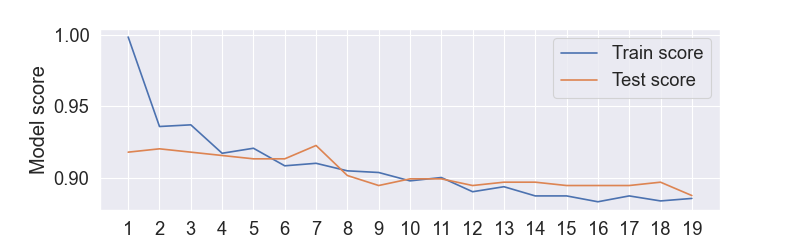

In [44]:
%matplotlib widget
from matplotlib.pyplot import figure
figure(figsize=(10, 3), dpi=80)
plt.plot(neighbors, train_scores, label = "Train score")
plt.plot(neighbors, test_scores, label = "Test score")
plt.xticks(np.arange(1, 20,  1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()


print(f"Maximum KNN score on the test data: {max(test_scores) *100:.2f}%")

## Hyperparameter runing with RandomizedSearch CV

In [19]:
#create hyperparameter grid for random forest
rf_grid = {"n_estimators":np.arange(10, 1000, 50),
          "max_depth": [None, 3, 5, 10],
          "min_samples_split": np.arange(2, 20, 2),
          "min_samples_leaf": np.arange(1, 20, 2)}

In [20]:
#set up random seed
np.random.seed(45)

#set up random hyperparameter search for forest

rs_rf = RandomizedSearchCV(RandomForestClassifier(),
                          param_distributions=rf_grid,
                          cv = 3,
                          n_iter = 100,
                          verbose = True)

#fit random hyperparameter search model for random forest
rs_rf.fit(x_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

## Hyperparameter tuning with grid search CV
I will take the best parameters from the RandomizedSearchCV and tune the model again using GridSearchCV

In [21]:
# Find best parameters
rs_rf.best_params_

{'n_estimators': 960,
 'min_samples_split': 14,
 'min_samples_leaf': 1,
 'max_depth': 10}

In [22]:
#hyper parameters using best parameters
rs_rf_grid = {"n_estimators":[960],
          "max_depth": [10],
          "min_samples_split":[12, 14, 16],
          "min_samples_leaf": [1, 2, 3]}
#set up grid for random forest

gs_rs_rf = GridSearchCV(RandomForestClassifier(),
                       param_grid = rs_rf_grid,
                       cv = 3,
                       verbose = True)

# fit grid hyperparameter search model
gs_rs_rf.fit(x_train, y_train)


Fitting 3 folds for each of 9 candidates, totalling 27 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10], 'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [12, 14, 16],
                         'n_estimators': [960]},
             verbose=True)

In [23]:
gs_rs_rf.best_params_

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 14,
 'n_estimators': 960}

In [24]:
gs_rs_rf.score(x_test, y_test)

0.9436619718309859

In [25]:
#Make predictions with tuned model
y_prediction = gs_rs_rf.predict(x_test)

In [26]:
y_prediction

array([1, 1, 1, 1, 1, 1, 1, 1, 2, 3, 3, 1, 1, 2, 1, 2, 3, 1, 1, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 3, 3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 2, 2, 1, 1, 1, 2, 1, 1, 1, 3, 3, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1,
       1, 1, 3, 1, 1, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 2, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1,
       1, 2, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 3,
       1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       1, 2, 1, 3, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1,
       2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 3, 1, 1, 2, 1, 1, 1, 2, 2, 2, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 3,
       3, 3, 1, 2, 3, 1, 3, 3, 1, 1, 2, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1,
       2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 3, 1,

In [27]:
y_test

222     1
1743    1
1632    1
1462    2
1847    1
       ..
663     2
1251    1
776     2
1029    1
1095    1
Name: fetal_health, Length: 426, dtype: int64

# Confusion matrix
Summary of prediction results

In [28]:
print(confusion_matrix(y_test, y_prediction))

[[322   7   4]
 [ 12  43   0]
 [  0   1  37]]


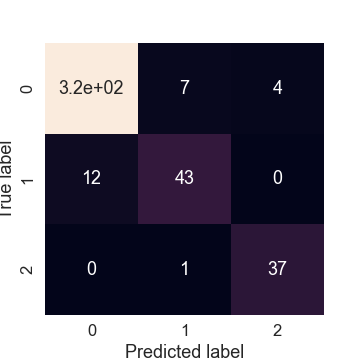

In [45]:
sns.set(font_scale = 1.5)
def plot_conf_mat(y_test, y_prediction):
    """
    confusion matrix using seaborn's heatmap
    """
    fig, ax = plt.subplots(figsize = (5,5))
    ax = sns.heatmap(confusion_matrix(y_test, y_prediction),
                    annot = True,
                    cbar = False)
    plt.xlabel("Predicted label")
    plt.ylabel("True label")
    
plot_conf_mat(y_test, y_prediction)

# Classification report as well as cross-validated precision, recall and F1 score

In [30]:
print(classification_report(y_test, y_prediction))

              precision    recall  f1-score   support

           1       0.96      0.97      0.97       333
           2       0.84      0.78      0.81        55
           3       0.90      0.97      0.94        38

    accuracy                           0.94       426
   macro avg       0.90      0.91      0.90       426
weighted avg       0.94      0.94      0.94       426



## Calculate evaluation metrics using cross validation
Calculate precision, recall, F1 score using cross validation using 'cross_val_score'

In [31]:
gs_rs_rf.best_params_

{'max_depth': 10,
 'min_samples_leaf': 1,
 'min_samples_split': 14,
 'n_estimators': 960}

In [32]:
#create new classifier with best parameters
clf = RandomForestClassifier(max_depth = 10,
                            min_samples_leaf = 1,
                            min_samples_split = 14,
                            n_estimators = 960)

In [33]:
#saving model to disk to use in web application
clf1 = clf.fit(x_train, y_train)
pickle.dump(clf1, open('model.pkl', 'wb'))

In [34]:
#Cross-validated accuracy
cv_acc = cross_val_score(clf, X, y,
                        cv = 5,
                        scoring = "balanced_accuracy")
cv_acc = np.mean(cv_acc)
cv_acc

0.7561725839282294

In [35]:
#Cross-validated precision
cv_precision = cross_val_score(clf, X, y,
                        cv = 5,
                        scoring = "precision_weighted")
cv_precision = np.mean(cv_precision)

cv_precision

0.880148628004957

In [36]:
#Cross-validated recall
cv_recall = cross_val_score(clf, X, y,
                        cv = 5,
                        scoring = "recall_weighted")
cv_recall = np.mean(cv_recall)

cv_recall

0.8687677437172052

In [37]:
#Cross-validated F1 score
cv_f1 = cross_val_score(clf, X, y,
                        cv = 5,
                        scoring = "f1_macro")
cv_f1 = np.mean(cv_f1)

cv_f1

0.7681744574070701

## Visualize cross validated metrics

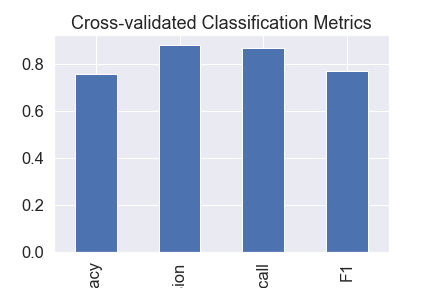

In [46]:
%matplotlib widget
#visualize cross-validated metrics
cv_metrics = pd.DataFrame({"Accuracy": cv_acc,
                          "Precision": cv_precision,
                          "Recall": cv_recall,
                          "F1": cv_f1},
                         index=[0])

cv_metrics.T.plot.bar(title = "Cross-validated Classification Metrics",
                     legend = False);

## Feature Importance
Which features contributed most to the outcomes and how

In [39]:
clf.feature_importances_

array([0.03196125, 0.05475252, 0.01721361, 0.03587916, 0.00574023,
       0.00097533, 0.05113591, 0.13354234, 0.14334264, 0.12819081,
       0.03698547, 0.03277681, 0.03637406, 0.02257988, 0.01497563,
       0.00322629, 0.05831617, 0.10176986, 0.05420723, 0.03117703,
       0.00487778])

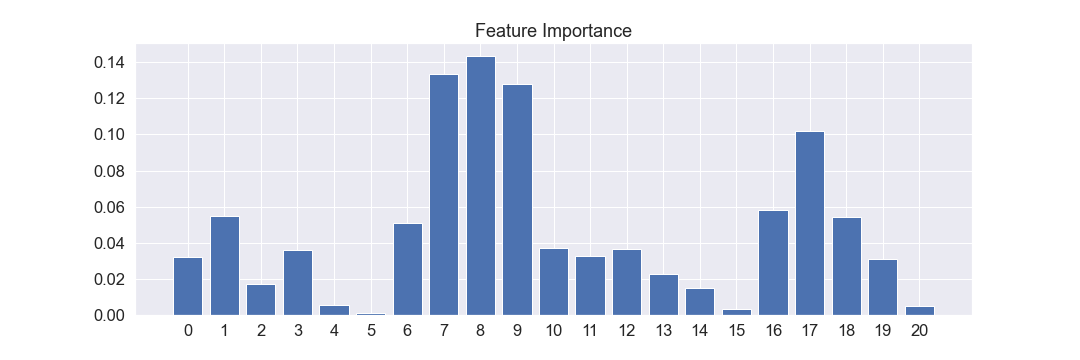

In [48]:
%matplotlib widget
plt.figure(figsize=(15
                    ,5))
plt.bar(range(len(clf.feature_importances_)), clf.feature_importances_)
plt.xticks(np.arange(0, 21,  1))
plt.title("Feature Importance")
plt.show()

In [41]:
import numpy as np
from flask import Flask, request, jsonify, render_template, redirect, url_for, request
import pickle
import pandas as pd
app = Flask(__name__)
import numpy as np



model = pickle.load(open('model.pkl', 'rb'))


app = Flask(__name__)


@app.route('/', methods=['GET', 'POST'])
def login():
    error = None
    if request.method == 'POST':
        if request.form['username'] != 'admin' or request.form['password'] != 'admin':
            error = 'Invalid Credentials. Please try again.'
        else:
            return redirect(url_for('home'))
    return render_template('login.html', error=error)
                    
@app.route('/home')
def home():
    return render_template('index.html')

@app.route('/visualizations')
def visualizations():
    return redirect('https://notebooks.gesis.org/binder/jupyter/user/daryakrutyeva-c-ficationjupyter-ym8l0gz1/lab/tree/Fetal%20health%20classification.ipynb')

@app.route('/predict',methods=['POST'])
def predict():
    '''
    For rendering results on HTML GUI
    '''
    int_features = [int(x) for x in request.form.values()]
    final_features = [np.array(int_features)]
    prediction = model.predict(final_features)

    output = round(prediction[0], 21)

    return render_template('index.html', prediction_text='The baby is {}, 1 = Healthy, 2 = Suspect, 3 = Pathological'.format(output))

if __name__ == "__main__":
    app.run()

 * Serving Flask app '__main__' (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
